# iexplot examples 
---
## Table of Contents

### **iexplot**
  - [Imports](#imports)  
  - [Initializing and loading data](#Loading)
    
**mda files** 
  - [Plotting mda files](#plotting_mda)
  - [Extracting mda data](#mda_data)
  - [Extracting mda meta data (extra pvs)](#mda_header)

**EA files**
  - [Plotting EA files](#plotting_EA)

**plotting tools**
  - [kwargs_and subplots](#kwargs_subplots)
    
**imagetool**
  - [ImageTool](#imagetool)

In [15]:
#imports

# for autocomplete to work
%config Completer.use_jedi = False  
# require for imagetool 
%gui qt 

from iexplot import *

# **Loading data with iexplot**

In [16]:
IEX_nData?

Init signature: IEX_nData(*scans, dtype='mdaAD', **kwargs)
Docstring:     
"
loads IEX (mda, EA, ADtiff) data and returns a dictionary containing pynData objects
    in Igor speak this is your experiment and the pynData objects are the waves
Init docstring:
*scans =>
    scanNum: for a single scan
    inf: for all scans in directory
    first,last: for all files between and including first and last; last can be inf
    first,last,countby: to load a subset
    [scanNum1,scanNum2]: to load a subset of scans

dtype: data type
    = "mdaAD" - mda and EA/mpa if exist (default, Note:path is to mda files)
    = "mda" - mda only
    = "EA" or "EAnc" for ARPES images only h5 and nc respectively
    = "mpa" - mpa only
    = "ADtiff"  

**kwargs
    path: full path to mda files directory (e.g. path="/net/s29data/export/data_29idc/2021_2/Jessica/mda/" )
        path = CurrentDirectory(dtype); default 

    prefix: filename prefix (e.g. "ARPES_" or "Kappa_" or "EA_")
        prefix = CurrentDirecto

### <font color=blue>Initializing IEXdata and loading the first scan

IEXdata creates a python object which not only holds the loaded data and meta but also contains methods for quick plotting. I must first be initialized 
</font>
<code>
     data = IEX_nData(scanNum,path='path_to_mda_folder',prefix='prefix_of_mda_scans')
</code>   
<br>
data is a dictionary of dictionaries of the scans with various methods for extracting the data and plotting
</font>
<code>    
     data.mda[scanNum] => contains all the data from the scanRecord
     data.mda[scanNum].EA => dictionary of all EA spectra for a single mda scan
     data.mda[scanNum].EA[EAnum] => is a single EA spectra with meta data 
     data.mda.AD[scanNum] => dictionary of all tiff files associated with an mda scan
</code>

Loading tiff files which are not associated with an mda file -- you need to change the dtype
<code>
     data = IEX_nData(scanNum,path='path_to_tiff_folder',prefix='prefix_of_tiff_scans',dtype='AD')
</code>   


In [3]:
#loading
path =  '/net/s29data/export/data_29idb/2021_2/mda'
prefix = 'ARPES_'
data = IEXdata(1143,path=path,prefix=prefix)

/net/s29data/export/data_29idb/2021_2/mda
/net/s29data/export/data_29idb/2021_2/mda/
path = /net/s29data/export/data_29idb/2021_2/mda


### <font color=blue>Loading the more data

In [4]:
data.update(1455,1460)

### <font color=blue>Loading the more data without reloading data already loaded

In [5]:
data.update(1455,1465,overwrite=False)

### <font color=blue>Loading the to last scan in progress

In [6]:
data.update(1455,inf,overwrite=False)

### <font color=blue>Reloading a scan

In [7]:
data.update(1467)

# **Plotting mda scans**

In [8]:
#plotting_mda
data.plot_mda?

Signature: data.plot_mda(scanNum, detNum, **kwargs)
Docstring:
simple plot for an mda scans either 1D or a row/column of a 2D data set
    
**kwargs
    data kwargs:
        1D: detector vs x-positioner (num = 1; default)
            posx_Num => to plot verses a different x-positioner number
            y_detNum => to plot verses a detector

        2D: detector vs positioner1 for both x and y (default)
            posx_Num => to plot verses a different x-positioner number
            posy_Num => to plot verses a different y-positioner number
            x_detNum => x-scale is a detector
            y_detNum => y-scale is a detector


    plotting kwargs:
        Norm2One: True/False to normalize spectra between zero and one (default => False)
        offset: y += offset 
        scale: y *= scale
        offset_x: x += offset_x 
        scale_x: x *= scale_x
        
    for 2D data: plots image by default
        row = index for plotting a single row from a 2D data set
        column

### <font color=blue>Plotting a single scan (1143): detector (17) vs positioner

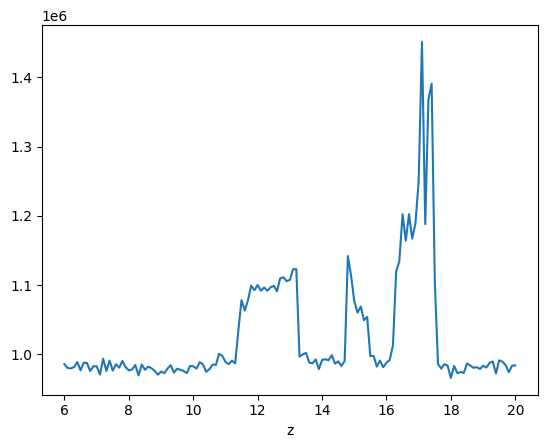

In [9]:
data.plot_mda(1143,17)

### <font color=blue>Plotting two detector on the same scan and normalizing to one

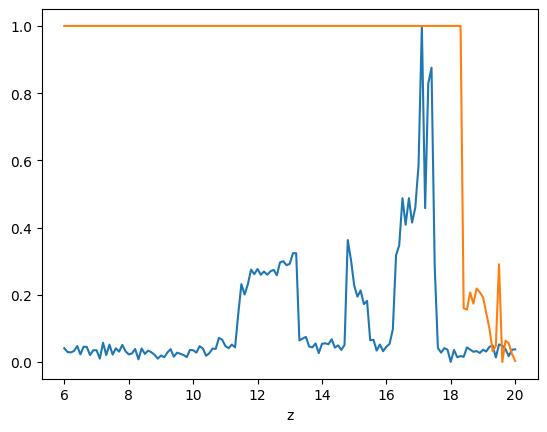

In [11]:
data.plot_mda(1143,17,Norm2One=True)
data.plot_mda(1143,16,Norm2One=True)

### <font color=blue>Plotting detector vs detector

In [12]:
path='/net/s29data/export/data_29idd/2021_1/Frano/mda/'
prefix='Kappa_'
data.update(1795,path=path,prefix=prefix)

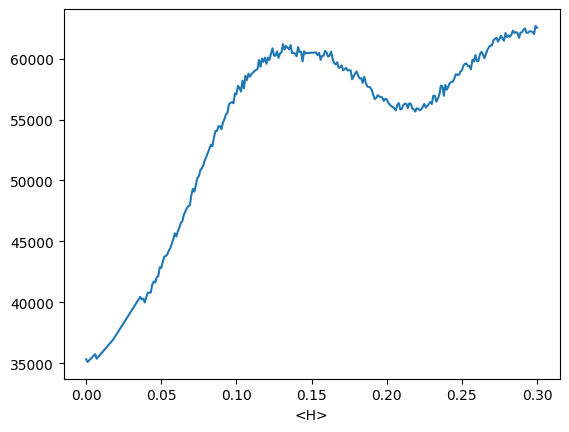

In [13]:
data.plot_mda(1795,35, x_detNum=46)

### <font color=blue>Plotting 2D mda scan

In [14]:
path='/net/s29data/export/data_29idc/2022_2/Comin/mda/'
prefix='ARPES_'
data.update(15,path=path,prefix=prefix)

/home/beams/29IDUSER/.conda/envs/imagetool/lib/python3.8/site-packages/iexplot/plotting.py:109: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xscale, yscale, img, **kwargs)


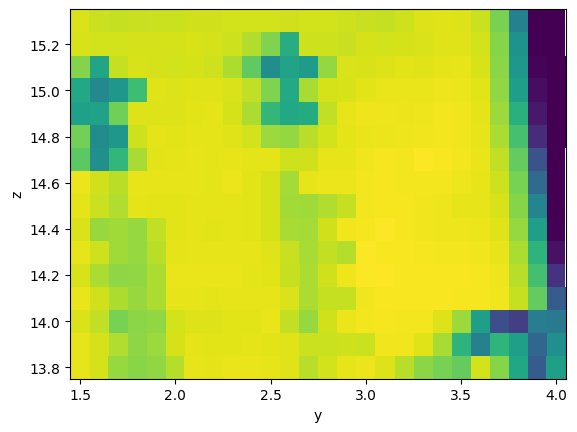

In [15]:
data.plot_mda(15,16)

### <font color=blue>Plotting sample map

In [23]:
data.plot_sample_map?

Signature: data.plot_sample_map(scanNum, **kwargs)
Docstring:
plots the relavent detectors for a sample map with an aspect ration of 1
kwargs:
    det_list => list of detectors to plot 
    title_list => list of titles for each detector
    figsize => figure size; use to make figure bigger so scales don't overlap (H,V)
                
    defaults:
    if prefix = 'ARPES_'
            det_list = [16,17] 
            title_list = ['TEY','EA'] 

    if prefix = 'Kappa_'
            det_list = [31,34] 
            title_list = ['TEY','D4'] 
File:      ~/.conda/envs/imagetool/lib/python3.8/site-packages/iexplot/IEX_pkg/Plot_MDA.py
Type:      method

In [16]:
path='/net/s29data/export/data_29idc/2022_1/Checkelsky/mda/'
prefix='ARPES_' #or 'Kappa_ depending if c-branch or d-branch' 

data=IEXdata(273,path=path,prefix=prefix)# initiates a variable "data" and loads scan 273

/net/s29data/export/data_29idc/2022_1/Checkelsky/mda/
/net/s29data/export/data_29idc/2022_1/Checkelsky/mda/
path = /net/s29data/export/data_29idc/2022_1/Checkelsky/mda/


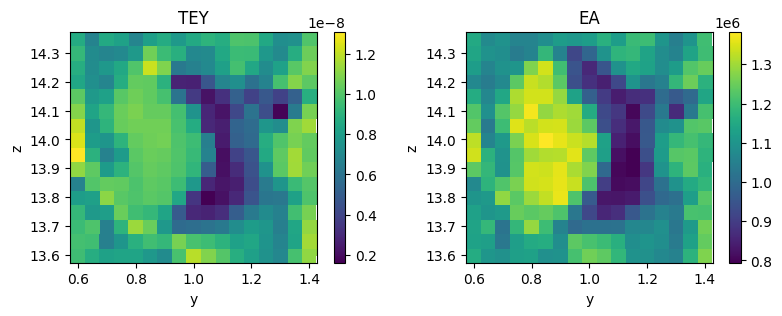

In [22]:
data.plot_sample_map(273,figsize=(40,3))

### <font color=blue>stack several mda scans

In [3]:
path = "/net/s29data/export/data_29idd/2025_1/McChesney/mda"
prefix = "Kappa_"
data = IEX_nData(160,178,path=path,prefix=prefix)

/net/s29data/export/data_29idd/2025_1/McChesney/mda
/net/s29data/export/data_29idd/2025_1/McChesney/mda/
path = /net/s29data/export/data_29idd/2025_1/McChesney/mda


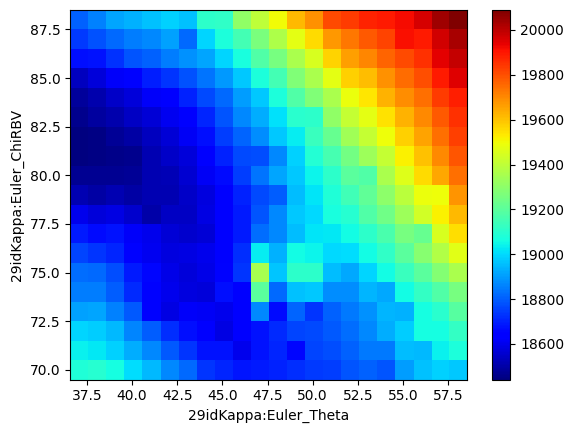

In [54]:
d = data.mda_stack_1D(160,178,detNum=33,pv='29idKappa:Euler_ChiRBV')
plot_nd(d,cmap='jet')
plt.colorbar()

In [51]:
from matplotlib.colors import ListedColormap
from pyimagetool.cmaps.CMap import *
cmp = CMap()

In [52]:
def imagetool_cmaps(key=None):
    """
    """
    kwargs.setdefault('ct_reverse',False)
    kwargs.setdefault('ct_gamma',1)
    cmap_list = cmp.cmaps
    if key == None:
        print('Available cmaps: ',cmap_list)
        return
    if key in cmap_list:
        dat=np.arange(1,2,1)
        dat = cmp.load_ct(key,kwargs['ct_reverse'], kwargs['ct_gamma'])
        cmap = ListedColormap(dat/255)
        return cmap
    else:
        print(key,'is not a available cmap \n Available cmaps: ',cmap_list)
        return


# **Extracting mda data**

### <font color=blue>mda list all positioners

In [6]:
data.mda_positioners_list(1143)

posx:
	0: ('29idc:m3.VAL', 'z', 'mm')


### <font color=blue >mda positioner data

In [7]:
data.mda_positioner(1143)

array([ 5.9975,  6.099 ,  6.199 ,  6.2985,  6.4   ,  6.4985,  6.5975,
        6.6975,  6.798 ,  6.8995,  7.    ,  7.102 ,  7.2015,  7.3015,
        7.401 ,  7.5   ,  7.6   ,  7.7   ,  7.7995,  7.9   ,  8.0005,
        8.099 ,  8.199 ,  8.3005,  8.4   ,  8.5   ,  8.601 ,  8.7015,
        8.8045,  8.9015,  9.004 ,  9.101 ,  9.203 ,  9.3   ,  9.3985,
        9.5   ,  9.5995,  9.7   ,  9.8   ,  9.8995,  9.999 , 10.1005,
       10.2005, 10.3005, 10.402 , 10.501 , 10.601 , 10.7015, 10.8   ,
       10.9015, 11.002 , 11.102 , 11.202 , 11.302 , 11.3995, 11.4975,
       11.5995, 11.6995, 11.7975, 11.898 , 11.999 , 12.1005, 12.1995,
       12.301 , 12.4015, 12.5015, 12.599 , 12.6975, 12.799 , 12.899 ,
       12.9985, 13.0995, 13.1995, 13.299 , 13.4005, 13.501 , 13.6005,
       13.702 , 13.8025, 13.9005, 14.002 , 14.1025, 14.2005, 14.3025,
       14.4005, 14.5015, 14.6005, 14.7005, 14.8005, 14.901 , 15.0005,
       15.101 , 15.2005, 15.3015, 15.4   , 15.4975, 15.5995, 15.6995,
       15.7995, 15.8

### <font color=blue >mda positioner label

In [8]:
data.mda_positioner_label(1143)

'z'

### <font color=blue>mda list all detectors

In [9]:
data.mda_detectors_list(1143)

1: ('S:SRcurrentAI.VAL', 'SR Current', 'mA')
2: ('EPS:29:ID:SS1:POSITION', 'SS1 Position Text', '')
3: ('29idmono:ENERGY_MON', 'Calculated Photon Energy', 'eV')
4: ('ID29:EnergySet.VAL', 'Set ID energy', 'keV')
5: ('ID29:Energy.VAL', 'ID energy readback', 'keV')
6: ('29idb:ca1:read', '', '')
7: ('29idb:ca2:read', '', '')
8: ('29idb:ca3:read', '', '')
9: ('29idb:ca4:read', '', '')
10: ('29idb:ca5:read', '', '')
11: ('29idb:ca10:read', '', '')
12: ('29idb:ca12:read', '', '')
13: ('29idb:ca13:read', '', '')
14: ('29idc:ca2:read', '', '')
15: ('29idb:ca15:read', '', '')
16: ('29idc:ca1:read', '', '')
17: ('29idcScienta:Stats4:Total_RBV', '', '')
18: ('29idARPES:LS335:TC1:IN2', '', '')


### <font color=blue>mda detector data

In [10]:
detNum = 15
data.mda_detector(1143,15)

array([-1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -1.87332496e-08, -1.87332496e-08, -1.87332496e-08,
       -1.87332496e-08, -

### <font color=blue>mda detector label

In [11]:
data.mda_detector_label(1143,15)

'29idb:ca15:read'

### <font color=blue>mda header ( all extra pvs)

In [4]:
data.mda_extra_pvs_all(1143)

{'sampleEntry': ('description', 'unit string', 'value', 'EPICS_type', 'count'),
 'filename': '/net/s29data/export/data_29idb/2021_2/mda/ARPES_1143.mda',
 'version': 1.2999999523162842,
 'scan_number': 1143,
 'rank': 1,
 'dimensions': [141],
 'acquired_dimensions': [141],
 'isRegular': 1,
 'ourKeys': ['sampleEntry',
  'filename',
  'version',
  'scan_number',
  'rank',
  'dimensions',
  'acquired_dimensions',
  'isRegular',
  'ourKeys'],
 '29idARPES:saveData_fileName': ('File Name', '', 'ARPES_1143.mda', 0, 0),
 '29idARPES:saveData_fileSystem': ('File System',
  '',
  '/net/s29data/export/data_29idb/2021_2',
  0,
  0),
 '29idARPES:saveData_subDir': ('Subdirectory', '', '/mda', 0, 0),
 '29idARPES:saveData_comment1': ('', '', '', 0, 0),
 '29idARPES:saveData_comment2': ('', '', '', 0, 0),
 '29idARPES:saveData_scanNumber': ('Next Scan Number', '', [1144], 33, 1),
 'S:SRcurrentAI.VAL': ('SR Current', 'mA', [101.91472853909133], 34, 1),
 'ID29:EnergyRBV.VAL': ('Create a Energy RBV in eV',
  '

### <font color=blue>mda extra pvs: by pv name (looks for string in pv name)

In [11]:
data.mda_extra_pvs(160,'mono')

pv desc val unit
29idmonoMIR:P.RBV Mirror Pitch 1.8072888183593752 deg
29idmonoGRT:P.RBV Grating Pitch 2.4508935302734374 deg
29idmonoMIR:X.RBV Mirror Translation -13.039 mm
29idmonoGRT:X.RBV Grating Translation 133.623 mm
29idmono:ENERGY_SP Desired Photon Energy 2100.0 eV
29idmono:ENERGY_MON Calculated Photon Energy 2099.981258 eV
29idmono:GRT_DENSITY  1200.0 lines/m


[1.8072888183593752,
 2.4508935302734374,
 -13.039,
 133.623,
 2100.0,
 2099.981258,
 1200.0]

### <font color=blue>mda extra pvs: by pv desc (looks for exact match)

In [6]:
print('x = ',data.mda_x(160))
print('y = ',data.mda_y(160))
print('z = ',data.mda_z(160))
print('th = ',data.mda_th(160))
#etc

x =  -2000.406
y =  -899.871
z =  1189.688
th =  57.575014426205584


### <font color=blue>mda sample info (based on prefix)

In [3]:
data.mda_sample(160)

{'29idKappa:m2.RBV': ('x', 'um', [-2000.406]),
 '29idKappa:m3.RBV': ('y', 'um', [-899.871]),
 '29idKappa:m4.RBV': ('z', 'um', [1189.688]),
 '29idKappa:m9.RBV': ('tth', 'degrees', [94.1602]),
 '29idKappa:m8.RBV': ('kth', 'degrees', [93.55812439875783]),
 '29idKappa:m7.RBV': ('kap', 'degrees', [96.96500000000002]),
 '29idKappa:m1.RBV': ('kphi', 'degrees', [35.96878092]),
 '29idKappa:Euler_ThetaRBV': ('th', '', [57.575014426205584]),
 '29idKappa:Euler_ChiRBV': ('chi', '', [70.00026137752918]),
 '29idKappa:Euler_PhiRBV': ('phi', '', [-0.014329052552246264]),
 '29idd:LS331:TC1:SampleA': ('(TA) Sample', '', [299.42]),
 '29idd:LS331:TC1:SampleB': ('(TB) Cold Finger', '', [297.95])}

In [10]:
data.mda_extra_pvs(160,'x',desc=True)

pv desc val unit
29idKappa:m2.RBV x -2000.406 um


-2000.406

### <font color=blue>mda xray info

In [21]:
print('polarization = ',data.mda_polarization(160))
print('id_sp = ',data.mda_id_sp(160))
print('hv = ',data.mda_hv(160))
print('grating = ',data.mda_grating(160))
print('slit = ',data.mda_slit_size(160))

polarization =  V
id_sp =  2.125
hv =  2099.981258
grating =  MEG
slit =  202.5


### <font color=blue>mda summary

In [8]:
path = "/net/s29data/export/data_29idd/2025_1/Brahlek/mda"
prefix = "Kappa_"
data = IEX_nData(1,41,path=path,prefix=prefix)

/net/s29data/export/data_29idd/2025_1/Brahlek/mda
/net/s29data/export/data_29idd/2025_1/Brahlek/mda/
path = /net/s29data/export/data_29idd/2025_1/Brahlek/mda


In [12]:
data.mda_summary(8,15)

|scanNum|positioner|polarization|hv|
|:-:|:-:|:-:|:-:|
|8|x|CW,  RCP|778.029|
|9|x|CW,  RCP|778.006|
|10|x|CW,  RCP|778.025|
|11|x|CW,  RCP|777.982|
|12|x|CW,  RCP|778.014|
|13|Desired Photon Energy|CW,  RCP|517.292|
|14|Desired Photon Energy|CW,  RCP|770.003|
|15|Desired Photon Energy|CW,  RCP|769.972|


### <font color=blue>mda summary - customized

In [14]:
from IPython.display import display_markdown

Sample_Positions={
    's1':(-850,-4060),
    's2':(-1200,-40),
    's3':(-846,2770),
    's4':(-2175,5500),}

def which_sample(scanNum,**kwargs):
    kwargs.setdefault('diff',10)

    x_scan = data.mda_x(scanNum)
    y_scan = data.mda_y(scanNum)
    
    for s,(x_pos,y_pos) in Sample_Positions.items():          
        sample = '---'
        if abs(x_scan-x_pos) < kwargs['diff'] and abs(y_scan-y_pos) < kwargs['diff']:
            return s

pv_list=['positioner','polarization','hv','th']

display_markdown('## Scan Summary',raw=True)
data.mda_summary(30,41,pv_list=pv_list,comment=which_sample)

## Scan Summary

|scanNum|positioner|polarization|hv|th|comment|
|:-:|:-:|:-:|:-:|:-:|:-:|
|30|Desired Photon Energy|CW,  RCP|760.013|90.0|s1|
|31|Desired Photon Energy|CW,  RCP|505.016|90.0|s2|
|32|Desired Photon Energy|CW,  RCP|759.996|90.0|s2|
|33|Desired Photon Energy|CW,  RCP|505.003|90.0|s3|
|34|Desired Photon Energy|CW,  RCP|760.027|90.0|s3|
|35|Desired Photon Energy|CW,  RCP|504.994|90.0|s3|
|36|Desired Photon Energy|CW,  RCP|760.0|90.0|s3|
|37|Desired Photon Energy|CW,  RCP|504.989|45.0|s1|
|38|Desired Photon Energy|CW,  RCP|760.003|45.0|s1|
|39|Desired Photon Energy|CW,  RCP|519.978|45.0|s2|
|40|Desired Photon Energy|CW,  RCP|760.001|45.0|s2|
|41|Desired Photon Energy|CW,  RCP|504.998|45.0|s3|


# **Plotting EA scans**

In [4]:
#plotting_EA
data.plot_EA?

Signature: data.plotEA(scanNum, EAnum=inf, BE=False, transpose=False, **kwargs)
Docstring:
simple plotting for EA spectra

EAnum = scan/sweep number 
        = inf => will sum all spectra

BE = False; Kinetic Energy scaling
BE = True; Binding Energy scaling
   where BE = hv-KE-wk (wk=None uses workfunction defined in the metadata)
    
transpose = False => energy is x-axis
            = True => energy is y-axis

** kwargs: are matplotlib kwargs like pcolormesh, cmap, vmin, vmax
File:      ~/.conda/envs/test/lib/python3.8/site-packages/iexplot/iexplot_EA.py
Type:      method


In [2]:
path='/net/s29data/export/data_29idc/2022_1/Hasan/mda/'
prefix='ARPES_'
data=IEXdata(219,path=path,prefix=prefix)


path = /net/s29data/export/data_29idc/2022_1/Hasan/mda/
Loaded mdaAD scanNums: [[219]]


### <font color=blue>Plotting EA spectra: single sweep

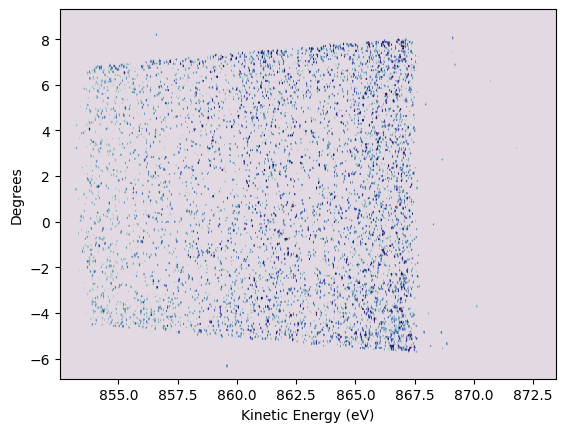

In [11]:
data.plot_EA(219,EAnum=1,cmap='twilight')

### <font color=blue>Plotting EA spectra: summed sweeps

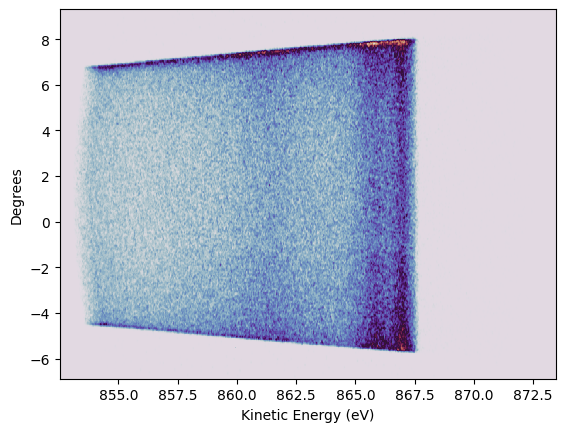

In [12]:
data.plot_EA(219,EAnum=inf,cmap='twilight')

### <font color=blue>Plotting EDCs

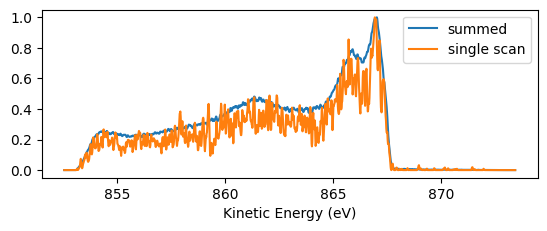

In [8]:
data.plot_EDC(219,Norm2One=True,label='summed')
data.plot_EDC(219,EAnum=2,Norm2One=True,label='single scan')
plt.legend()

# **Keyword args (kwargs) and subplots**

### <font color=blue>Using additional kwargs and subplots
<font color=blue>Note: plotEDC and plotmda use the same **kwargs

In [8]:
path = '/net/s29data/export/data_29idc/2022_1/Khalili/mda/'
prefix = 'ARPES_'
data=IEXdata(4,24,path=path,prefix=prefix)

/net/s29data/export/data_29idc/2022_1/Khalili/mda/
/net/s29data/export/data_29idc/2022_1/Khalili/mda/
path = /net/s29data/export/data_29idc/2022_1/Khalili/mda/


### <font color=blue>Using cmaps for plot colors

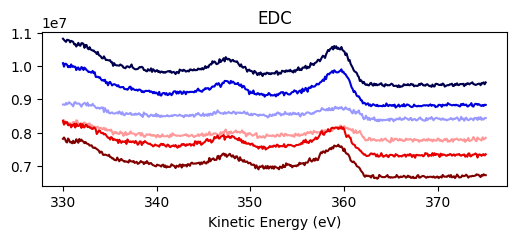

In [56]:
scanNum_list = [4,16,8,20,12,24]

plt.figure(figsize=(6,2))
plt.title('EDC')

n = len(scanNum_list)

cmap = plt.colormaps['seismic']
#cmap = imagetool_cmaps('cold_warm')
colors = cmap(np.linspace(0,1,n))

for i,scanNum in enumerate(scanNum_list):
    data.plot_EDC(scanNum, label=str(scanNum),color=colors[i],offset=i*.5e6)
    
plt.show()

### <font color=blue>Example of unpacking a data for loop and subplots

In [13]:
data=IEXdata(17,29,path='/net/s29data/export/data_29idc/2022_1/Meyers/mda/',prefix='ARPES_')

path = /net/s29data/export/data_29idc/2022_1/Meyers/mda/
Loaded mdaAD scanNums: [[17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29]]


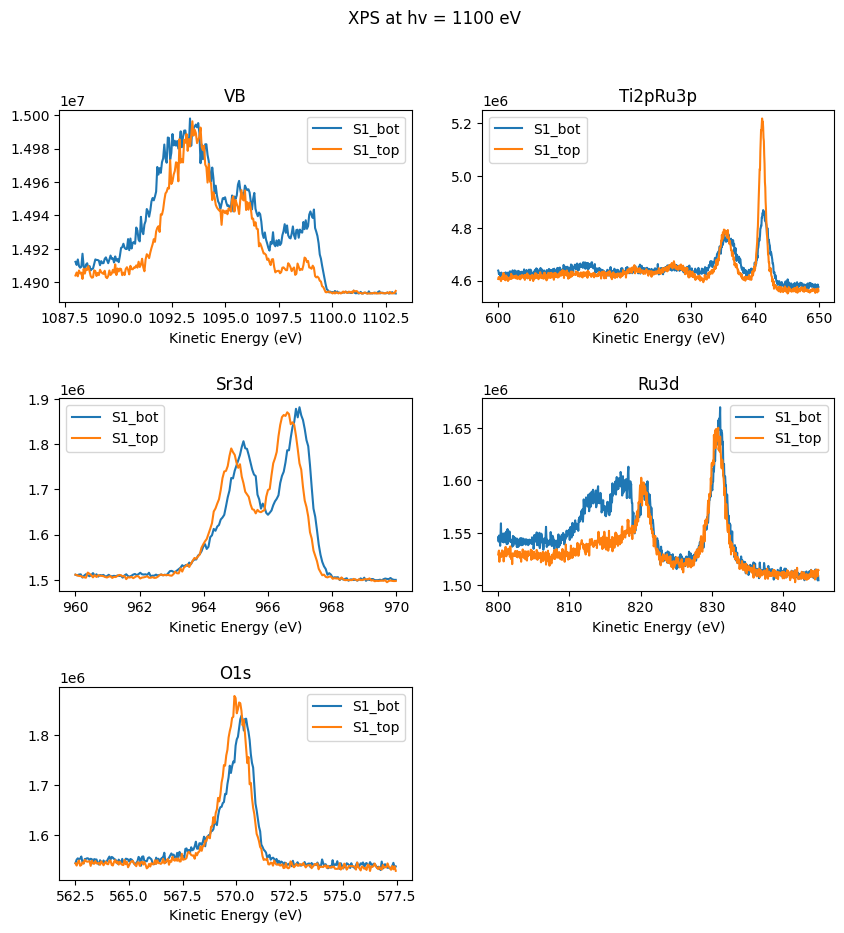

In [14]:
plt.figure(figsize=(10,10))
plt.suptitle('XPS at hv = 1100 eV')
plt.subplots_adjust(hspace=.5)

edgelist = ['VB', 'Ti2pRu3p', 'Sr3d', 'Ru3d', 'O1s']
first_bottom = 17
first_top = 24

for i,edge in enumerate(edgelist):
    plt.subplot(3,2,i+1)
    plt.title(edge)
    data.plotEDC(first_bottom+i,label='S1_bot')
    data.plotEDC(first_top+i,label='S1_top')
    plt.legend()
plt.show()

# EA meta data

In [4]:
data.EA_sample(15)

{'x': -0.8300000000000001,
 'y': 0.0,
 'z': 12.5,
 'theta': 9.004625,
 'chi': 0.0,
 'phi': 0.0,
 'TA': 24.441,
 'TB': 14.158,
 'TEY': 6.427916e-09,
 'TEY2': 2.505636e-14}

In [5]:
data.EA_setting(15)

{'lensMode': 1,
 'acqMode': 1,
 'passEnergy': 200.0,
 'frames': 80.0,
 'sweeps': None,
 'kineticEnergy': 494.9985032,
 'SESslit': 5.0}

In [6]:
data.EA_hv(15)

500.0008212

In [8]:
data.EA_beamline(15)

{'hv': 500.0008212,
 'grating': 1200.0,
 'ID': 0.5052852630615234,
 'polarization': 0,
 'exitSlit': 99.79199940828406,
 'ringCurrent': 102.13579149909134}

# **ImageTool**

In [2]:
from iexplot import *
path='/net/s29data/export/data_29idc/2021_2/NXschool/mda/'
prefix='ARPES_'
data=IEXdata(15,path=path,prefix=prefix,crop=True)

<generator object Path.glob at 0x7ff020da0f20>
/net/s29data/export/data_29idc/2021_2/NXschool/mda/
/net/s29data/export/data_29idc/2021_2/NXschool/mda/
path = /net/s29data/export/data_29idc/2021_2/NXschool/mda/


In [1]:
#imagetool
data.plot_stack_mdaEA(15,xCen=498.78,cmap='BuPu')

NameError: name 'data' is not defined

### <font color=blue>Using ImageTool colormaps

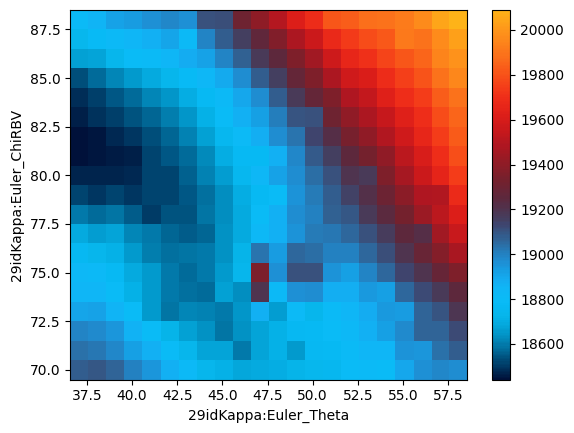

In [55]:
d = data.mda_stack_1D(160,178,detNum=33,pv='29idKappa:Euler_ChiRBV')
plot_nd(d,cmap=imagetool_cmaps('cold_warm'))
plt.colorbar()